In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")

!pip install ultralytics roboflow

PyTorch version: 2.8.0+cu126
CUDA available: True
GPU: Tesla T4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow

In [3]:
API_KEY = "7vesM069lXwafjarJssi"
WORKSPACE = "roboflow-jvuqo"
PROJECT_NAME = "football-players-detection-3zvbc"
VERSION_NUMBER = 17

In [5]:
rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT_NAME)
dataset = project.version(VERSION_NUMBER).download("yolov8")

print(f"Dataset downloaded to: {dataset.location}")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-17 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 7188.52it/s]

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Dataset downloaded to: /content/football-players-detection-17


In [7]:
from ultralytics import YOLO
import os

In [9]:
model = YOLO('yolo11s.pt')

In [11]:
dataset_path = os.path.join(dataset.location, "data.yaml")
print(f"Training with dataset: {dataset_path}")

Training with dataset: /content/football-players-detection-17/data.yaml


In [14]:
results = model.train(data=dataset_path, epochs=100, imgsz = 640, batch = 16, patience = 10, save = True, project = "training_model", name = "soccer_model_v1", cache = True)
print("Training is complete!")

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-detection-17/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=soccer_model_v13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, persp

In [16]:
best_model = YOLO('training_model/soccer_model_v13/weights/best.pt')

metrics = best_model.val()
print(f"mAP: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")


Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1480.7±658.2 MB/s, size: 57.5 KB)
val: Scanning /content/football-players-detection-17/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 64.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.2it/s 3.2s
                   all         49       1174      0.902      0.758      0.812      0.525
                  ball         45         45      0.932      0.307      0.385      0.165
            goalkeeper         38         39      0.828      0.923      0.958      0.621
                player         49        973      0.947      0.955      0.984      0.724
               referee         49        117        0.9      0.847      0.923      0.589
Speed: 9.4ms preprocess, 15.


image 1/1 /content/football-players-detection-17/valid/images/54745b_9_2_png.rf.ecd32e19bd19bfa5cc844ee958a8822c.jpg: 640x640 2 balls, 1 goalkeeper, 22 players, 1 referee, 15.6ms
Speed: 1.7ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


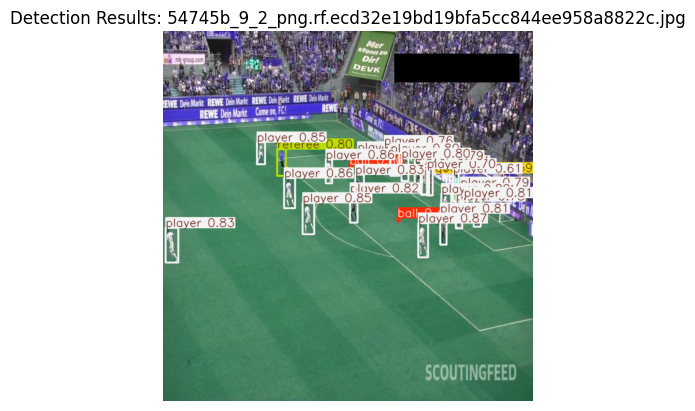


image 1/1 /content/football-players-detection-17/valid/images/54745b_9_2_png.rf.ecd32e19bd19bfa5cc844ee958a8822c.jpg: 640x640 2 balls, 1 goalkeeper, 22 players, 1 referee, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


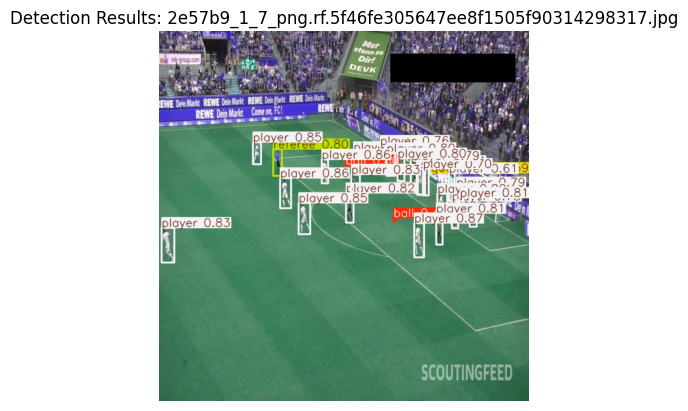


image 1/1 /content/football-players-detection-17/valid/images/54745b_9_2_png.rf.ecd32e19bd19bfa5cc844ee958a8822c.jpg: 640x640 2 balls, 1 goalkeeper, 22 players, 1 referee, 18.3ms
Speed: 2.5ms preprocess, 18.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


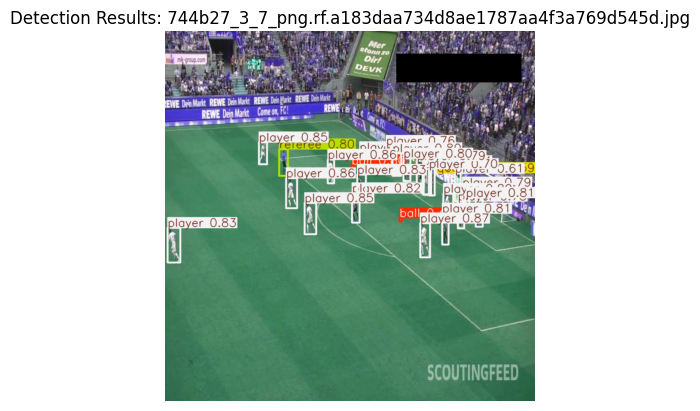

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

val_images_path = os.path.join(dataset.location, "valid/images")
test_images = os.listdir(val_images_path)[:3]

for img_name in test_images:
    img_path = os.path.join(val_images_path, img_namae)

    results = best_model(img_path)

    annotated_img = results[0].plot()
    plt.imshow(annotated_img)
    plt.title(f'Detection Results: {img_name}')
    plt.axis('off')
    plt.show()

In [20]:
from google.colab import files

!zip -r soccer_model.zip /content/training_model/soccer_model_v13/
files.download("soccer_model.zip")

print("Model Downloaded!")

  adding: content/training_model/soccer_model_v13/ (stored 0%)
  adding: content/training_model/soccer_model_v13/weights/ (stored 0%)
  adding: content/training_model/soccer_model_v13/weights/last.pt (deflated 8%)
  adding: content/training_model/soccer_model_v13/weights/best.pt (deflated 8%)
  adding: content/training_model/soccer_model_v13/BoxP_curve.png (deflated 12%)
  adding: content/training_model/soccer_model_v13/args.yaml (deflated 53%)
  adding: content/training_model/soccer_model_v13/BoxPR_curve.png (deflated 13%)
  adding: content/training_model/soccer_model_v13/train_batch2.jpg (deflated 1%)
  adding: content/training_model/soccer_model_v13/results.csv (deflated 62%)
  adding: content/training_model/soccer_model_v13/val_batch0_labels.jpg (deflated 5%)
  adding: content/training_model/soccer_model_v13/BoxR_curve.png (deflated 10%)
  adding: content/training_model/soccer_model_v13/train_batch0.jpg (deflated 2%)
  adding: content/training_model/soccer_model_v13/results.png (de

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Downloaded!


In [21]:
training_info= {
  "model_path": "/content/training_model/soccer_model_v13/weights/best.pt",
  "dataset": f'{WORKSPACE}/{PROJECT_NAME}/v{VERSION_NUMBER}',
  "epochs": 100,
  "batch_size": 16,
  "imgsz": 640,
  "patience": 10,
  "mAP": metrics.box.map,
  "mAP50": metrics.box.map50
}

import json

with open('training_info.json', 'w') as f:
    json.dump(training_info, f, indent = 2)
files.download("training_info.json")

print("Training Info Downloaded!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Info Downloaded!
